In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.16.1


In [3]:
# Load numpy array
data = np.load('./AP_data/age_data_images_100_100.pickle', allow_pickle=True)
df = pd.DataFrame(data)

X = df.drop('age', axis=1).values  # PCA data with 50 components
y = df['age'].values  # Target or dependent variable (age)

# Reshape X to 4D tensor for CNN
X = X.reshape(X.shape[0], 100, 100, 1)

print(X.shape, y.shape)


(2382, 100, 100, 1) (2382,)


In [4]:
# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(1905, 100, 100, 1) (477, 100, 100, 1) (1905,) (477,)


In [5]:
# Build the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='linear'))  # Regression output
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

input_shape = (100, 100, 1)
model = create_cnn_model(input_shape)
model.summary()


c:\Aafrith\Age-prediction-Model\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,369,985 (12.86 MB)

 Trainable params: 3,369,985 (12.86 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

# Save the trained model
model.save('./AP_model/model_cnn.h5')


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - loss: 538.4618 - mae: 18.4601 - val_loss: 603.0834 - val_mae: 19.3783
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 272.2193 - mae: 12.6781 - val_loss: 532.8544 - val_mae: 17.7038
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - loss: 281.0279 - mae: 13.0072 - val_loss: 478.2622 - val_mae: 16.4620
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - loss: 282.4510 - mae: 13.0678 - val_loss: 519.7905 - val_mae: 17.5764
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - loss: 266.4331 - mae: 12.6545 - val_loss: 528.0229 - val_mae: 17.7661
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 249.2702 - mae: 12.2314 - val_loss: 396.5664 - val_mae: 14.6811
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - loss: 227.3794 - mae: 11.7511 - val_loss: 387.8314 - val_mae: 14.7762
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - loss: 203.4256 - mae: 11.0661 - val_loss: 301.0564 - val_mae: 12.6728


In [7]:
# Model Evaluation
y_pred = model.predict(x_test).flatten()

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Mean Absolute Error (MAE): 8.778814937583556
Mean Squared Error (MSE): 139.44752499532171
Root Mean Squared Error (RMSE): 11.808790157984928
R^2 Score: 0.3915985722619204


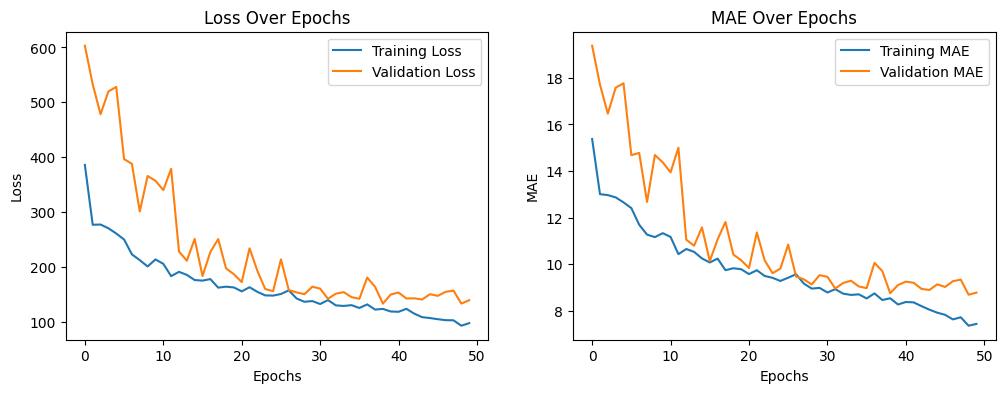

In [8]:
# Visualize training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE Over Epochs')

plt.show()
